<a href="https://colab.research.google.com/github/Manuelstv/VIT-LSBGs/blob/main/download_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import urllib
import urllib.request
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import clear_output, display
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

#%matplotlib inline
# ====================================
# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    # if you have LaTeX installed on your laptop, uncomment the line below for prettier labels
    #plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return
plot_pretty()

In [ ]:
# Mount drive to upload the datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/datasets/fits

/content/drive/My Drive/datasets/fits2


In [ ]:
# Read the file that contains RAs and DECs 
df = pd.read_csv('random_lsbgs.csv')
# Get coords
coadd_id = df['coadd_id'].values
ra = df['ra'].values
dec = df['dec'].values

# Calculate the length - the number of the candidates - it is going to be useful
N_cand = len(ra)
print("Number of objects to check is:")
print(N_cand)

print(ra[0],dec[0])

Number of objects to check is:
19996
359.793893 1.554095


Instead of downloading all images at once, it's a better idea to download a number of N_file images, save to your drive and, in the end, just concantenate everything in just one file. That way, if something happens along the way you will just lose a few images and not the entire dataset you are trying to download. 

In [ ]:
ps=0.13
#Number of images in each file
N_file = 1000
for j in range (0,int(np.ceil(N_cand/N_file))):
  Array = np.zeros([N_file,256,256,3])
  for k in range (0, N_file):
    i = k+N_file*j
    RA_loc = ra[i] #The RA of the i-th object
    DEC_loc = dec[i]
    url_name = "https://www.legacysurvey.org/viewer/cutout.fits?ra={0}&dec={1}&layer=des-dr1&pixscale={2}".format(RA_loc,DEC_loc,ps)
    fig_name = "Image_cand.fits"
    urllib.request.urlretrieve(url_name, fig_name)
    #if deprecated, you may use #urllib.urlretrieve(url_name, fig_name)
    hdu = fits.open('Image_cand.fits')
    data = hdu[0].data[:,:]
    data = np.moveaxis(data, 0, -1)
    Array[k] = data

    clear_output(wait=True)
    print(k)
    print('File:',j)
    print('Imagem:',i)

  np.save('fits_lsbgs_{0}'.format(j), data)

792
File: 0
Imagem: 792


KeyboardInterrupt: ignored

In [ ]:
X_pos = np.float64(np.load("/content/drive/My Drive/datasets/fits/fits_lsbgs_0.npy"))
X_pos1 = np.float64(np.load("/content/drive/My Drive/datasets/fits/fits_lsbgs_1.npy"))
X_pos2 = np.float64(np.load("/content/drive/My Drive/datasets/fits/_fits_lsbgs_2.npy"))
X_pos3 = np.float64(np.load("/content/drive/My Drive/datasets/fits/_fits_lsbgs_3.npy"))
X_pos4 = np.float64(np.load("/content/drive/My Drive/datasets/fits/_fits_lsbgs_4.npy"))
X_pos5 = np.float64(np.load("/content/drive/My Drive/datasets/fits/_fits_lsbgs_5.npy"))
X_pos6 = np.float64(np.load("/content/drive/My Drive/datasets/fits/_fits_lsbgs_6.npy"))
X_pos7 = np.float64(np.load("/content/drive/My Drive/datasets/fits/_fits_lsbgs_7.npy"))
X_pos8 = np.float64(np.load("/content/drive/My Drive/datasets/fits/_fits_lsbgs_8.npy"))
X_pos9 = np.float64(np.load("/content/drive/My Drive/datasets/fits/_fits_lsbgs_9.npy"))

In [ ]:
a = np.concatenate((X_pos,X_pos1,X_pos2,X_pos3,X_pos4,X_pos5,X_pos6,X_pos7,X_pos8,X_pos9))

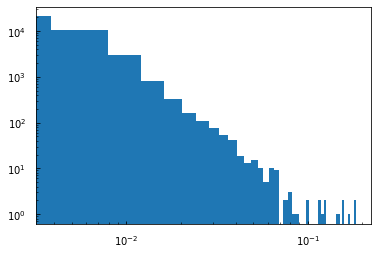

In [ ]:
plt.hist(data[:,:,0].flatten(),bins = 50)
#plt.axvline(np.percentile(data[:,:,0], 50), color ='red')
plt.yscale('log')
plt.xscale('log')
plt.show()